In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax


# Correct paths
weather_data_path = '/Users/andrewfearney27/Downloads/df_cleaned.csv'
pleasant_weather_path = '/Users/andrewfearney27/Downloads/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'

# Load the datasets
weather_data = pd.read_csv(weather_data_path)
pleasant_weather = pd.read_csv(pleasant_weather_path)

In [215]:
pleasant_weather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [216]:
weather_data.head()

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0                  7            0.85           1.018   
1           1                  6            0.84           1.018   
2           2                  8            0.90           1.018   
3           3                  3            0.92           1.018   
4           4                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [217]:
weather_data.shape

(22950, 136)

In [218]:
weather_data['DATE'] = pleasant_weather['DATE'].astype(str)
weather_2010s = weather_data[weather_data['DATE'].str.startswith('201')]

#Drop the 'DATE' column after filtering
weather_2010s.drop(columns=['DATE'], inplace=True)

print("Shape of pleasant data after drop:", weather_2010s.shape)

Shape of pleasant data after drop: (3652, 136)


/var/folders/mh/jgcdcff53n3ft01xcw7qxswc0000gn/T/ipykernel_10579/295709916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2010s.drop(columns=['DATE'], inplace=True)


In [219]:
#Check if date exists in pleasant_weather only (for date-based operations)
print("Shape of pleasant weather data before filtering:", pleasant_weather.shape)

#Ensure the 'DATE' column is treated as a string
pleasant_weather['DATE'] = pleasant_weather['DATE'].astype(str)

#Filter the data for the years 2010 onwards
pleasant_2010s = pleasant_weather[pleasant_weather['DATE'].str.startswith('201')]

#Drop the 'DATE' column after filtering
pleasant_2010s.drop(columns=['DATE'], inplace=True)

print("Shape of pleasant data after drop:", pleasant_2010s.shape)

Shape of pleasant weather data before filtering: (22950, 16)
Shape of pleasant data after drop: (3652, 15)


/var/folders/mh/jgcdcff53n3ft01xcw7qxswc0000gn/T/ipykernel_10579/740490079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pleasant_2010s.drop(columns=['DATE'], inplace=True)


In [220]:
pleasant_2010s.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263                       0                          0   
18264                       0                          0   
18265                       0                          0   
18266                       0                          0   
18267                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0                      0   
18265                          0                      0   
18266                          0                      0   
18267                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   
18264                           0                           0   
18265                           0                           0   
18266                           0                           0   
18267                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0  
18264                          0  
18265                          0  
18266                          0  
18267                          0

In [221]:
# Check if 'DATE' column exists before attempting to drop it
if 'DATE' in pleasant_2010s_filtered.columns:
    df_filtered = pleasant_2010s_filtered.drop(columns=['DATE'], inplace=False)
else:
    df_filtered = pleasant_2010s_filtered.copy()  # If 'DATE' doesn't exist, just copy the dataframe

# Assuming your original DataFrame before conversion to NumPy is df_filtered
feature_names = df_filtered.columns

In [223]:
# Combine the 15 columns in the pleasant weather data into a single column
y_1_combined = pleasant_2010s.max(axis=1)
print("Shape of y_1_combined:", y_1_combined.shape)

# Ensure y has the correct shape
y_1 = y_1_combined.to_numpy().reshape(-1)
print(y_1.shape)


Shape of y_1_combined: (3652,)
(3652,)


In [224]:
# Create X matrix
X_1 = weather_2010s.to_numpy()

# Check the shapes of X and y
print(X_1.shape)
print(y_1.shape)


(3652, 136)
(3652,)


In [225]:
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

# Check shapes of the training and testing sets
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)


(2739, 136) (2739,)
(913, 136) (913,)


In [231]:
# Filter weather dataset to 2000s
df_2000s = weather_data[weather_data['Unnamed: 0'].astype(str).str.startswith('200')]
print(df_2000s.head())

# Filter pleasant dataset to 2000s
pleasant_2000s = pleasant_weather[pleasant_weather['DATE'].astype(str).str.startswith('200')]
print(pleasant_2000s.head())


      Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
200          200                  8            0.83           1.018   
2000        2000                  6            0.69           1.018   
2001        2001                  5            0.69           1.018   
2002        2002                  4            0.68           1.018   
2003        2003                  5            0.62           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
200                     0.91                 1.54             0.1   
2000                    3.12                 0.00            11.0   
2001                    3.30                 0.00            12.4   
2002                    3.34                 0.00            12.7   
2003                    2.95                 0.00             9.8   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
200              15.4            13.4            18.7  ...   
2000             19.7            1

In [232]:
# Drop 'DATE' and 'MONTH' columns from 2000s weather dataset
df_2000s_2 = df_2000s.drop(columns=['Unnamed: 0'])  # Replace 'Unnamed: 0' with the correct column if necessary
print(df_2000s_2.shape)

# Drop 'DATE' column from 2000s pleasant dataset
pleasant_2000s_2 = pleasant_2000s.drop(columns=['DATE'])
print(pleasant_2000s_2.shape)


(111, 136)
(3653, 15)


In [251]:
# Filter both datasets to 2000s based on the 'DATE' column
weather_2000s = weather_data[weather_data['DATE'].astype(str).str.startswith('200')]
pleasant_2000s = pleasant_weather[pleasant_weather['DATE'].astype(str).str.startswith('200')]

# Check if filtering produces the same number of rows
assert len(weather_2000s) == len(pleasant_2000s), "Filtered data lengths do not match!"

# Drop the 'DATE' and 'MONTH' columns from both datasets if necessary
weather_2000s_2 = weather_2000s.drop(columns=['DATE', 'MONTH'], errors='ignore')
pleasant_2000s_2 = pleasant_2000s.drop(columns=['DATE'], errors='ignore')

# Reset indices to ensure alignment
weather_2000s_2.reset_index(drop=True, inplace=True)
pleasant_2000s_2.reset_index(drop=True, inplace=True)

# Ensure data lengths still match after dropping columns
assert len(weather_2000s_2) == len(pleasant_2000s_2), "Data lengths after column drop do not match!"

# Proceed with matrix creation and other preprocessing steps
y_2_combined = pleasant_2000s_2.max(axis=1)
y_2 = y_2_combined.to_numpy().reshape(-1)
X_2 = weather_2000s_2.to_numpy()

# Ensure shapes match before splitting
print(f"Shape of y_2: {y_2.shape}")
print(f"Shape of X_2: {X_2.shape}")

# Perform train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

# Check resulting shapes
print("Shapes after split:")
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)



Shape of y_2: (3653,)
Shape of X_2: (3653, 136)
Shapes after split:
(2739, 136) (2739,)
(914, 136) (914,)


In [282]:
# Filter the 2010s weather data
df_2010s = weather_data[weather_data['DATE'].astype(str).str.startswith('201')]
pleasant_2010s = pleasant_weather[pleasant_weather['DATE'].astype(str).str.startswith('201')]

# Drop the 'DATE' column from both datasets if necessary
df_2010s_2 = df_2010s.drop(columns=['DATE', 'MONTH'], errors='ignore')
pleasant_2010s_2 = pleasant_2010s.drop(columns=['DATE'], errors='ignore')

# Create matrices for the 2010s data
y_1_combined = pleasant_2010s_2.max(axis=1)
y_1 = y_1_combined.to_numpy().reshape(-1)
X_1 = df_2010s_2.to_numpy()
b
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

Model Accuracy (2010s):  0.9726177437020811
Unique classes in y_train_1: [0 1]
Number of unique classes: 2


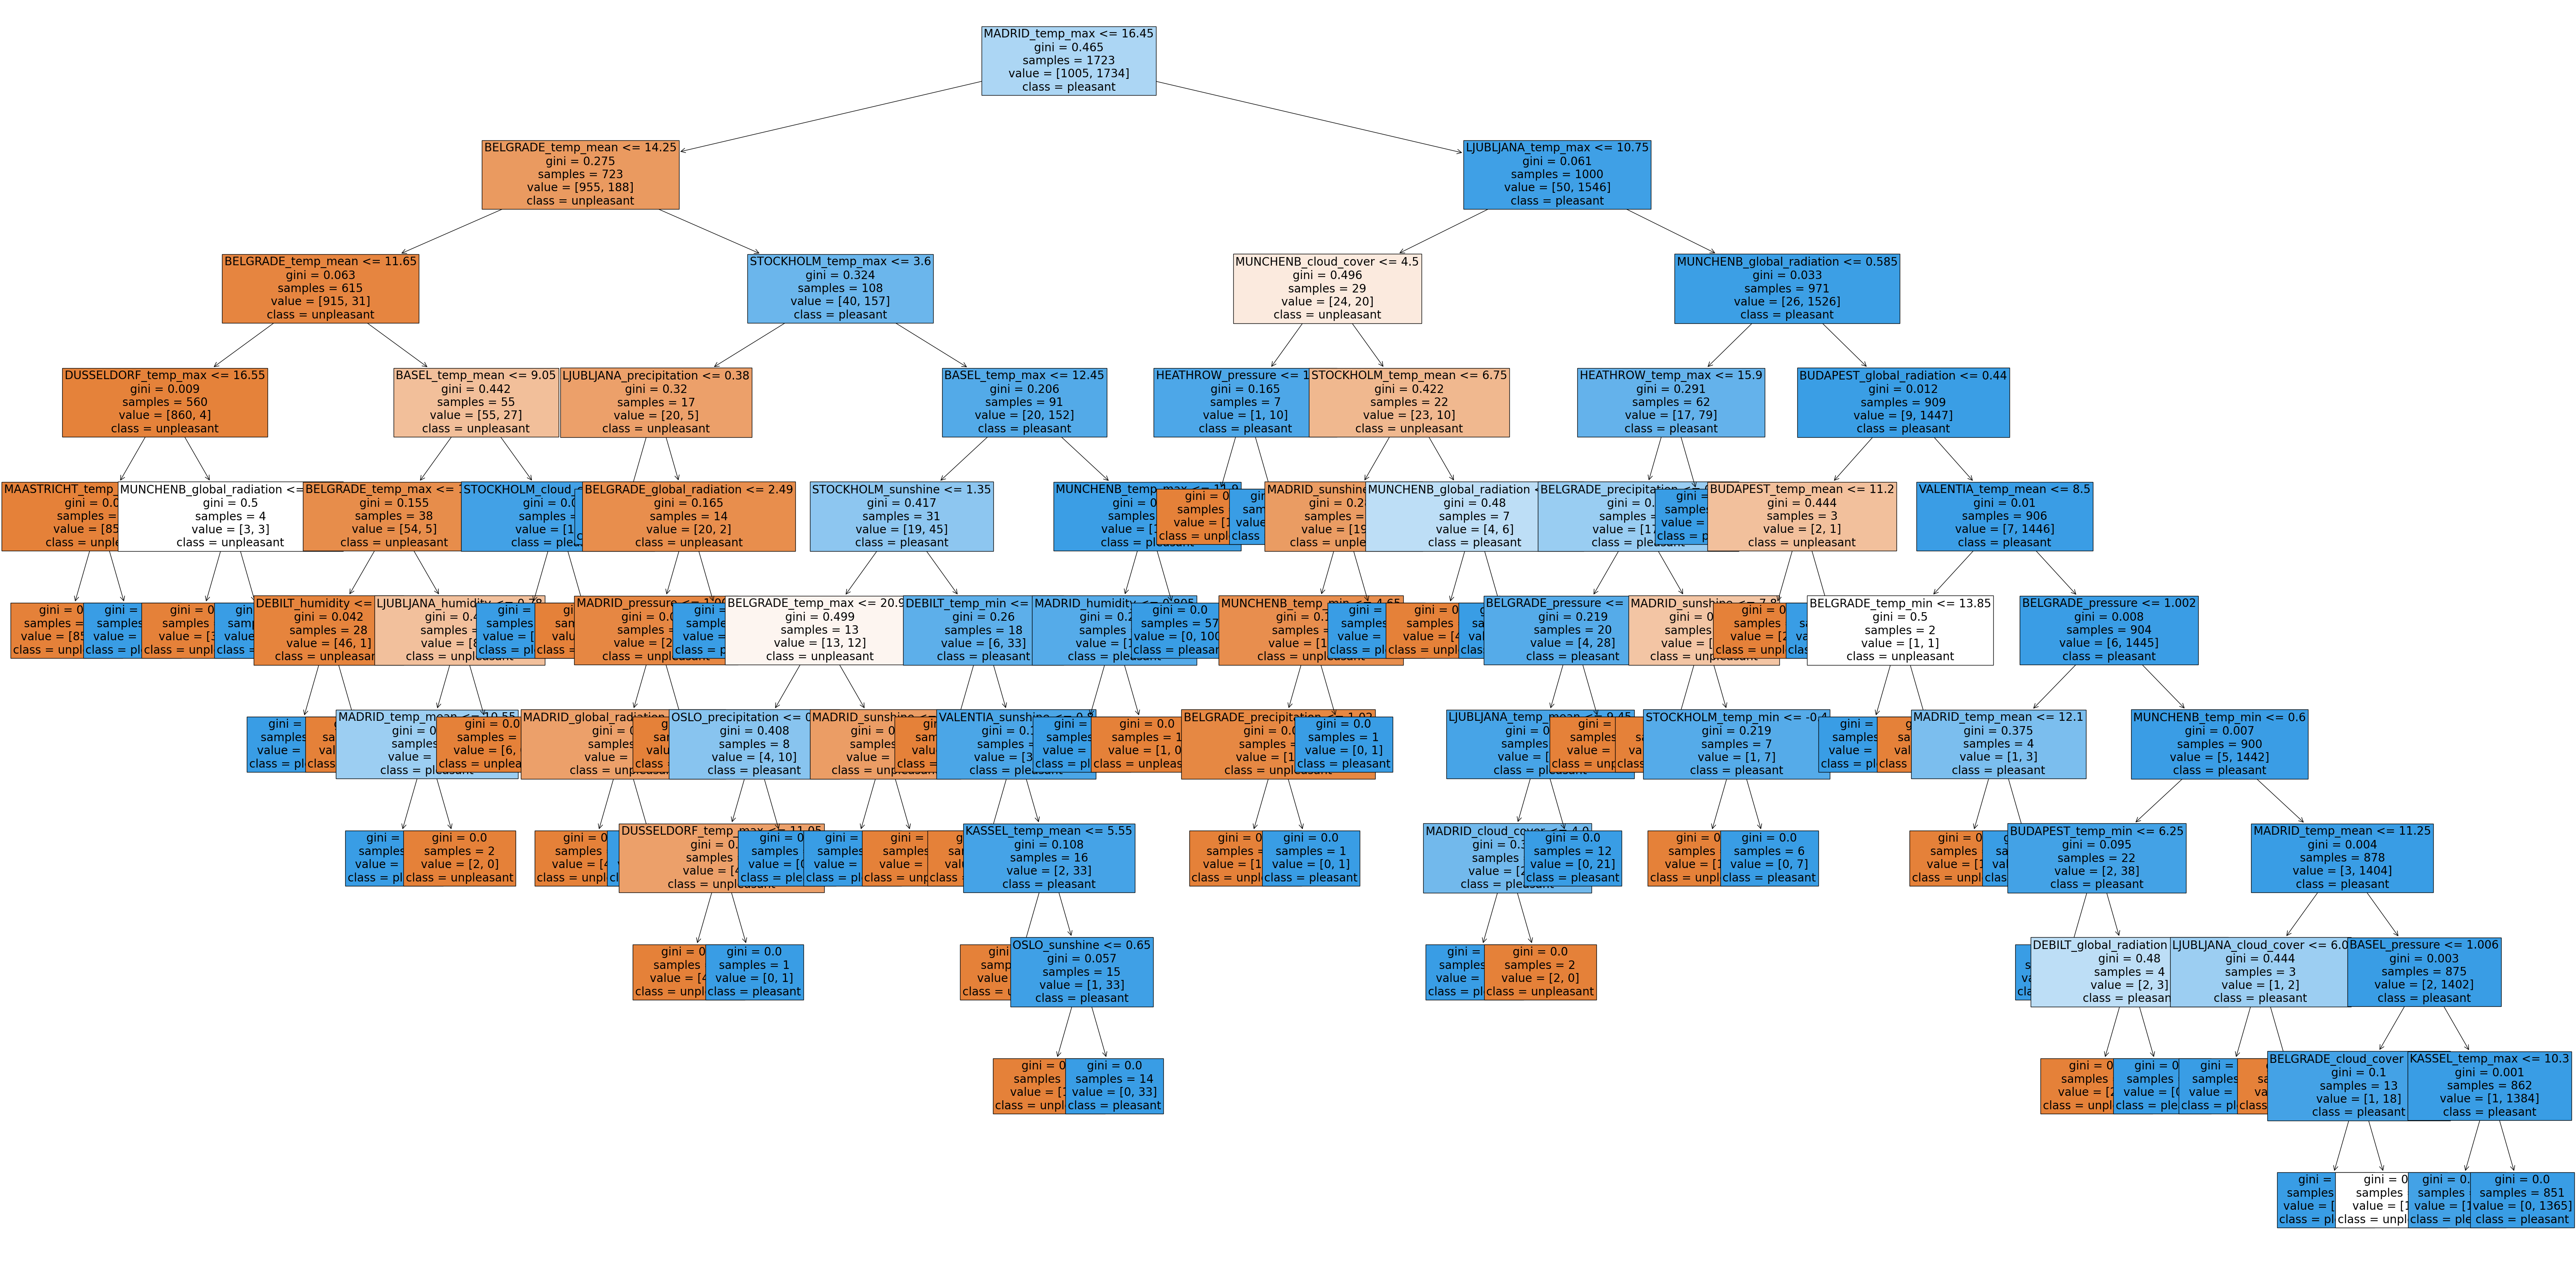

In [283]:
#3
# Create a Random Forest classifier
clf_1 = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the model on the training dataset
clf_1.fit(X_train_1, y_train_1)

# Perform predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)

# Use metrics module for accuracy calculation
print("Model Accuracy (2010s): ", metrics.accuracy_score(y_test_1, y_pred_1))

# Check unique values in y_train_1
unique_classes_1 = np.unique(y_train_1)
print("Unique classes in y_train_1:", unique_classes_1)
print("Number of unique classes:", len(unique_classes_1))

# Plot random forest for 2010s
rf_1 = plt.figure(figsize=(80, 40))
plot_tree(clf_1.estimators_[5], fontsize=20, feature_names=df_2010s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show()

Model Accuracy (2000s):  0.9638949671772429


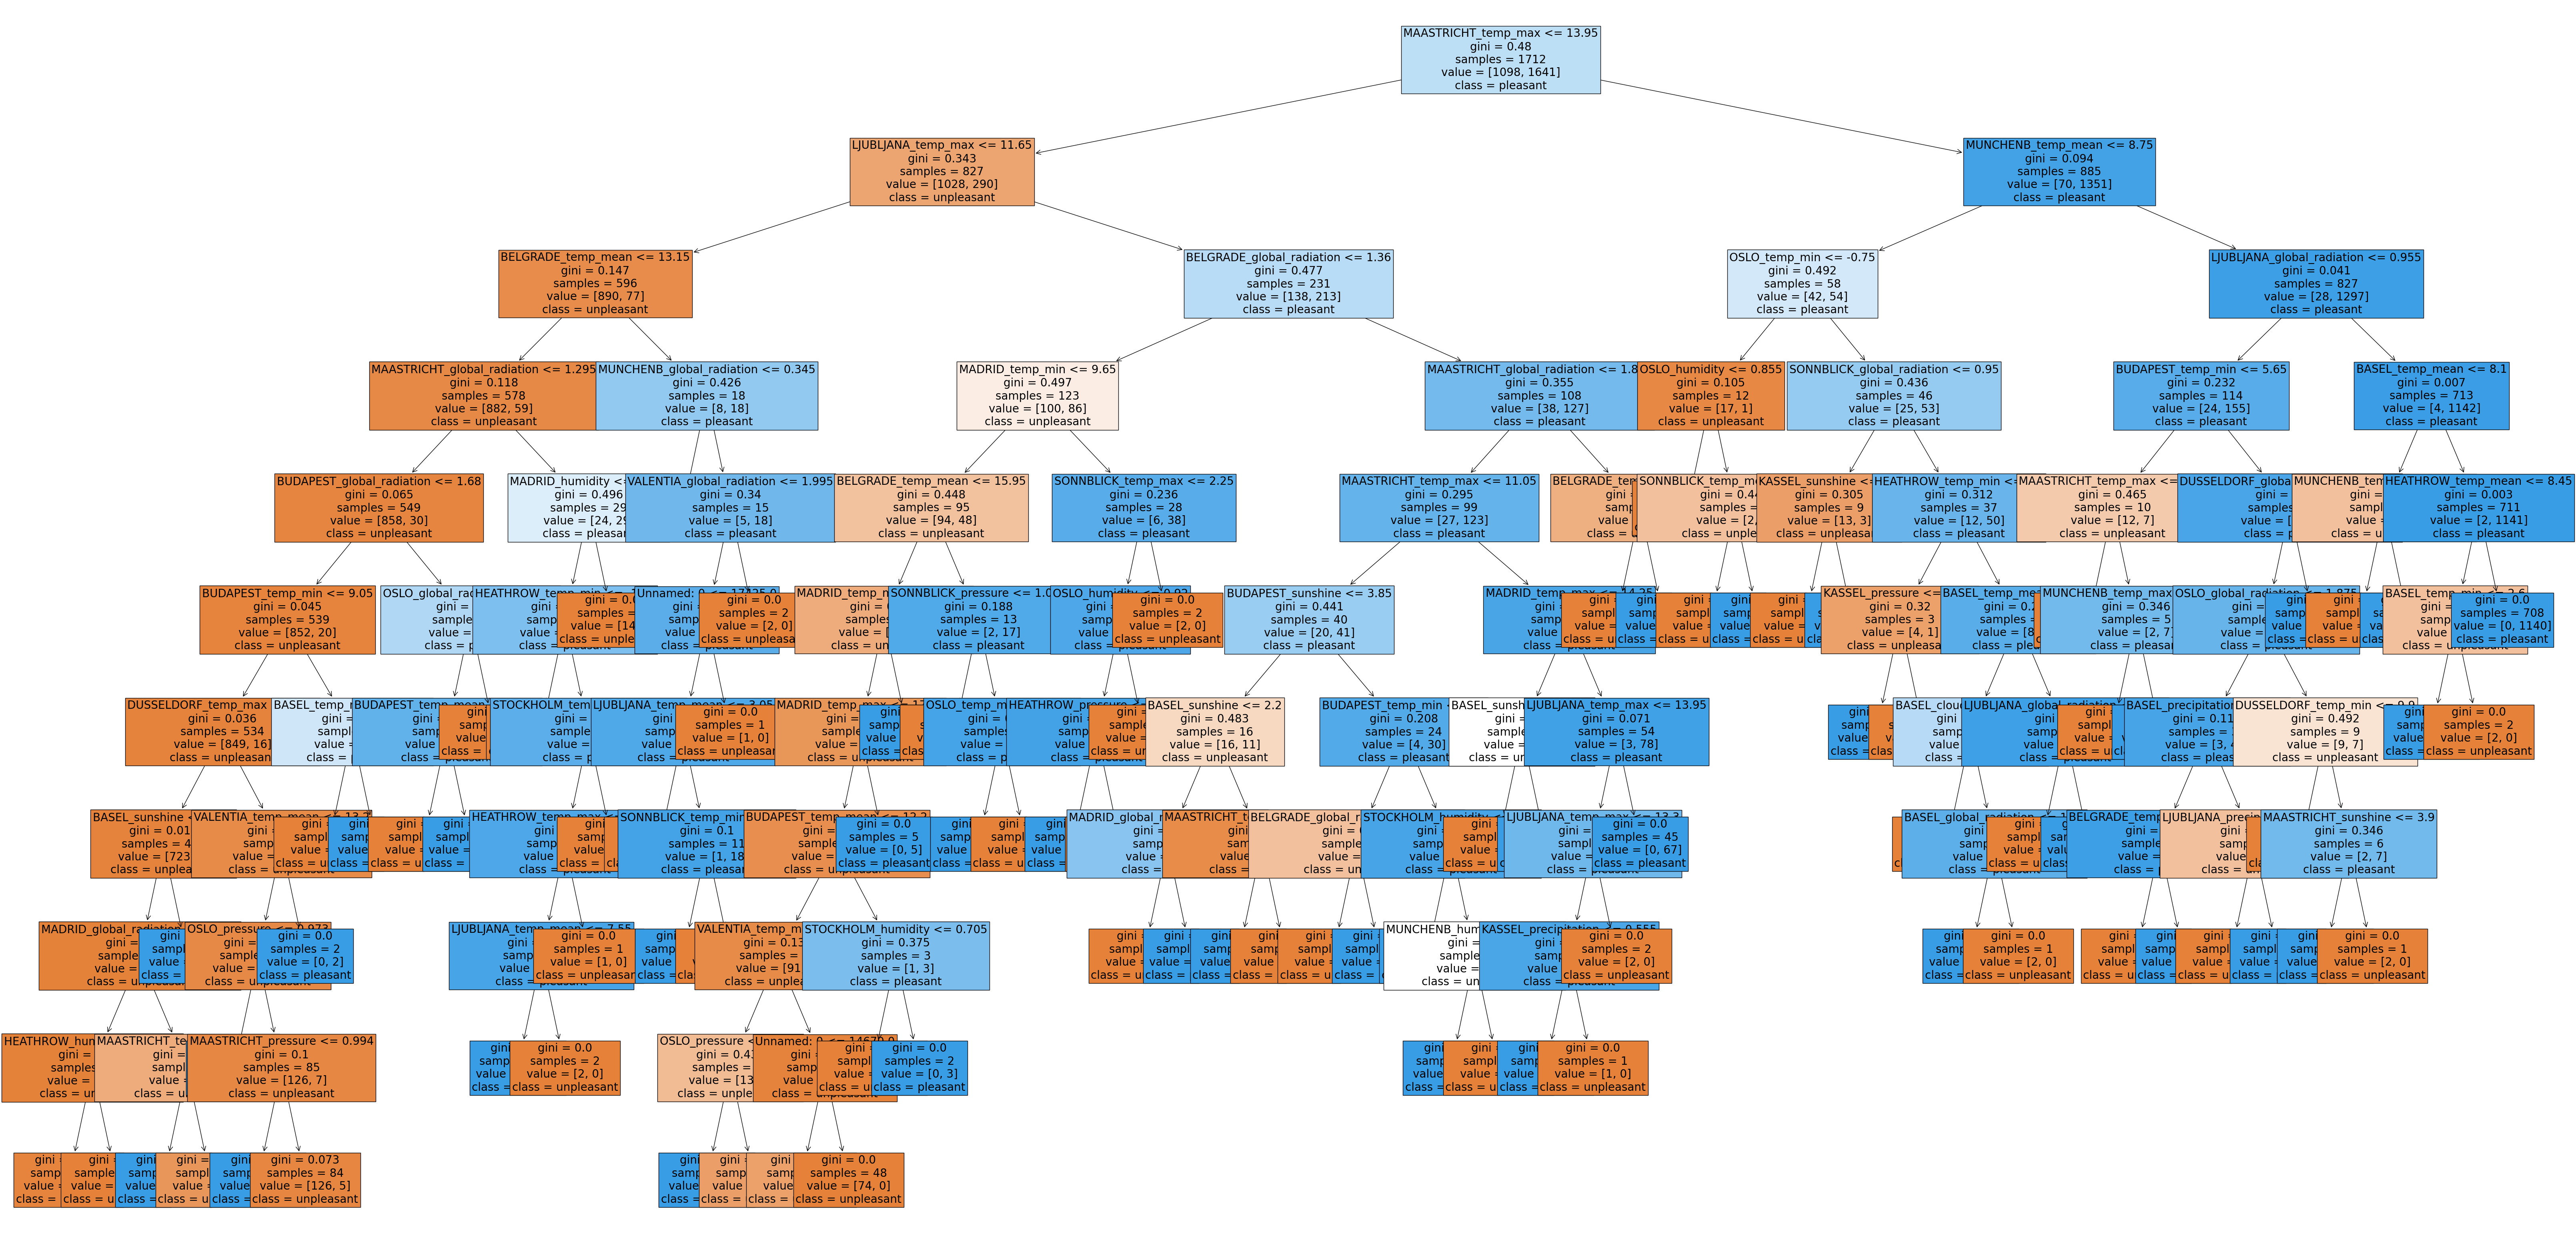

In [253]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)

# Training the model on the training dataset
clf_2.fit(X_train_2, y_train_2)

# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)

# Use metrics module for accuracy calculation
print("Model Accuracy (2000s): ", metrics.accuracy_score(y_test_2, y_pred_2))

# Plot random forest for 2000s
rf_2 = plt.figure(figsize=(80, 40))
plot_tree(clf_2.estimators_[5], fontsize=20, feature_names=weather_2000s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show()


In [262]:
#4
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [1.25455065e-03 5.21957425e-04 1.18562822e-03 1.22717567e-03
 1.59036037e-03 5.67188499e-04 6.96913557e-04 5.12024718e-02
 3.58178930e-03 3.29229745e-02 1.01936355e-03 2.66056606e-03
 1.90189626e-03 1.77544071e-03 3.13253828e-03 1.36953256e-03
 2.28649518e-02 3.01949203e-03 2.50528535e-02 2.73240154e-04
 0.00000000e+00 0.00000000e+00 1.16109786e-03 6.26384860e-04
 1.01104763e-03 3.73461841e-02 9.18505187e-03 4.74287675e-02
 6.34651274e-04 9.30559882e-04 9.59949395e-04 7.35520818e-03
 6.72017114e-04 8.41893447e-04 1.32015399e-02 1.08952609e-03
 2.65669137e-02 4.49534556e-04 8.47914733e-04 1.37672200e-03
 2.74983079e-03 4.86357146e-04 8.69249656e-04 2.65282100e-02
 1.01452784e-03 4.08776755e-02 5.36147243e-04 7.68274921e-04
 1.31327381e-03 7.38014125e-03 5.84843126e-04 1.17173337e-03
 3.92187732e-03 1.25949068e-03 6.70218204e-04 1.73400230e-02
 4.42244934e-04 9.68636255e-04 6.05034921e-04 1.39488737e-04
 4.57416572e-04 1.13490025e-03 7.01930155e-04 8.82870274e-04
 7.

In [266]:
# Check the shape of your feature importances array
print("Feature Importances Shape:", feature_importances_1.shape)

# Reshape the feature importances for plotting (2010s Data)
reshaped_importances_1 = feature_importances_1.reshape(-1, 8, 17)
print("Reshaped Importances Shape (2010s):", reshaped_importances_1.shape)


Feature Importances Shape: (136,)
Reshaped Importances Shape (2010s): (1, 8, 17)


In [267]:
# Sum the values across the last dimension to get one observation for each weather station (2010s Data)
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)
print("Collapsed Importances Shape (2010s):", collapsed_importances_1.shape)
print("Collapsed Importances (2010s):", collapsed_importances_1)

# Create a list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


Collapsed Importances Shape (2010s): (8,)
Collapsed Importances (2010s): [0.1294753  0.1364984  0.12664068 0.03801686 0.14642535 0.30840024
 0.07004588 0.04449728]


In [271]:
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)
print(feature_importances.shape)


Feature Importances: [1.]
(1,)


In [273]:
print("Number of features used:", len(clf.feature_importances_))


Number of features used: 1


In [274]:
if len(clf.feature_importances_) == 1:
    print("Model is using only one feature, skipping reshaping.")
    reshaped_importances = clf.feature_importances_
else:
    reshaped_importances = clf.feature_importances_.reshape(1, 15, 9)
    print("Reshaped Importances Shape:", reshaped_importances.shape)


Model is using only one feature, skipping reshaping.


In [286]:
# Check if reshaping is necessary
if len(feature_importances_1) > 1:
    # Modify reshape dimensions to match the size of the array
    reshaped_importances_1 = feature_importances_1.reshape(-1, 8, 17)  # Example reshape (adjust based on your data)
    print("Reshaped Importances Shape:", reshaped_importances_1.shape)
else:
    reshaped_importances_1 = feature_importances_1
    print("Skipping reshaping as there's only one feature.")

# Continue with the rest of your code...


Reshaped Importances Shape: (1, 8, 17)


In [288]:
print("Length of weather_stations:", len(weather_stations))
print("Length of collapsed_importances_1:", len(collapsed_importances_1))


Length of weather_stations: 15
Length of collapsed_importances_1: 8


In [289]:
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)


ValueError: cannot reshape array of size 136 into shape (15,9)

In [290]:
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)


Collapsed Feature Importances:
  Weather Station  Importance
5        HEATHROW    0.257801
4      DUSSELDORF    0.210135
1        BELGRADE    0.187159
2        BUDAPEST    0.107816
0           BASEL    0.075419
6          KASSEL    0.064793
7       LJUBLJANA    0.060103
3          DEBILT    0.036773


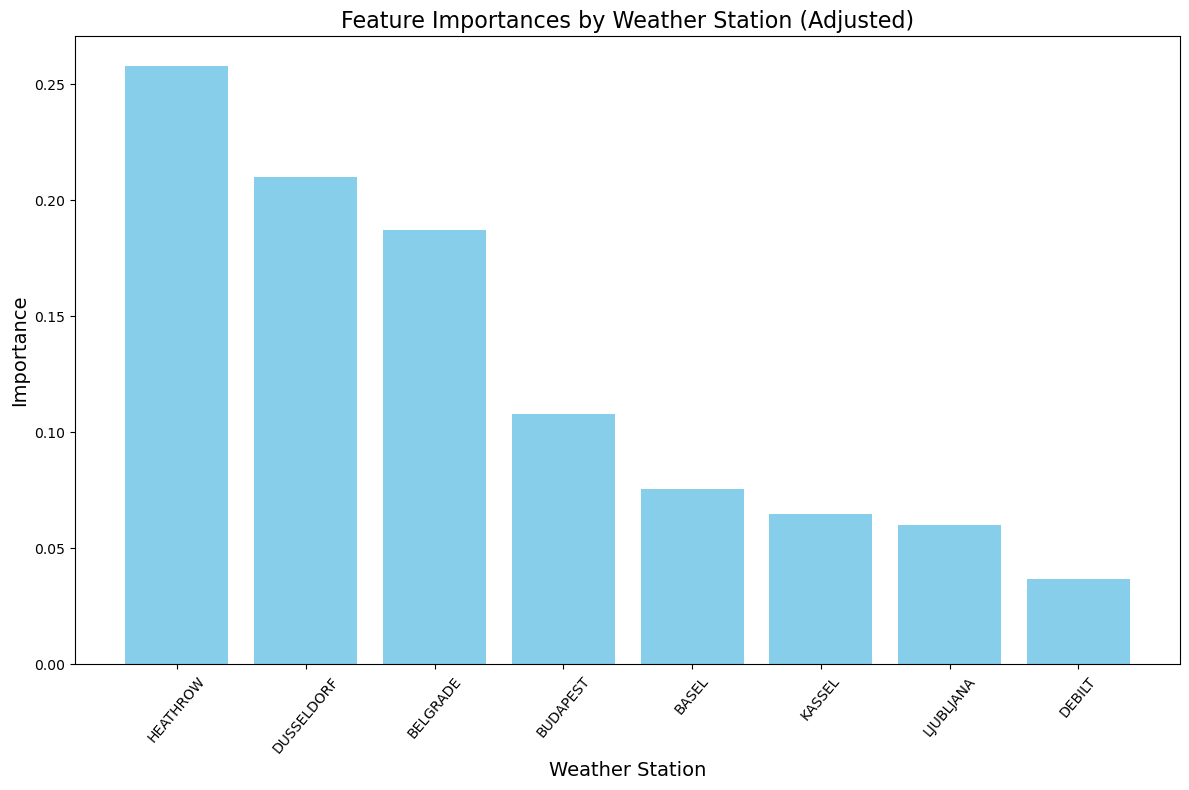

In [292]:
# If the number of collapsed importance values is less than the number of weather stations
if len(collapsed_importances_1) != len(weather_stations):
    print(f"Adjusting weather_stations to match length of collapsed_importances_1")
    weather_stations = weather_stations[:len(collapsed_importances_1)]

# Now create the dataframe
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

# Continue with sorting and plotting
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

# Plot the importances
plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (Adjusted)', fontsize=16)
plt.tight_layout()
plt.show()

In [294]:
# Retrieve feature importances from the trained model for the 2000s data
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)
print(feature_importances_2.shape)


Feature Importances: [0.00171429 0.00055897 0.00147294 0.00108546 0.00188095 0.00063957
 0.00111645 0.03567201 0.00719917 0.02164934 0.00111987 0.00280229
 0.0011839  0.01467266 0.00207396 0.00266795 0.04332549 0.00464682
 0.02920395 0.00045438 0.0016542  0.00122297 0.01014857 0.00118732
 0.00157898 0.07731187 0.01054662 0.04385296 0.00039425 0.00118952
 0.00127803 0.00420853 0.00057054 0.00104705 0.0071345  0.00168988
 0.00461018 0.0006202  0.00076296 0.00079329 0.00374729 0.0011944
 0.00100047 0.00217857 0.00126942 0.019835   0.00053402 0.00095842
 0.00101753 0.0057604  0.00072022 0.00079343 0.01313847 0.00169434
 0.0004555  0.00379135 0.00071365 0.00140569 0.00240166 0.00097169
 0.00119902 0.01465105 0.01216718 0.01733714 0.00046572 0.00212089
 0.00121226 0.0027495  0.00128184 0.00108463 0.05701746 0.00189929
 0.05901535 0.00070305 0.00091015 0.00126575 0.00378979 0.0005384
 0.00070304 0.00279344 0.00131137 0.01969737 0.00101857 0.00293772
 0.00275253 0.01485476 0.00202975 0.0052728

In [295]:
# Reshape the feature importances to (-1, 15, 9)
if len(feature_importances_2) > 1:
    reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)
    print("Reshaped Importances Shape:", reshaped_importances_2.shape)
else:
    reshaped_importances_2 = feature_importances_2
    print("Skipping reshaping as there's only one feature.")

# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

ValueError: cannot reshape array of size 136 into shape (15,9)

Reshaped Importances Shape: (1, 8, 17)
Collapsed Importances Shape: (8,)
Collapsed Importances: [0.14083528 0.19049656 0.05382674 0.07726854 0.15871975 0.28254683
 0.04052298 0.05578333]
Collapsed Feature Importances:
  Weather Station  Importance
5        HEATHROW    0.282547
1        BELGRADE    0.190497
4      DUSSELDORF    0.158720
0           BASEL    0.140835
3          DEBILT    0.077269
7       LJUBLJANA    0.055783
2        BUDAPEST    0.053827
6          KASSEL    0.040523


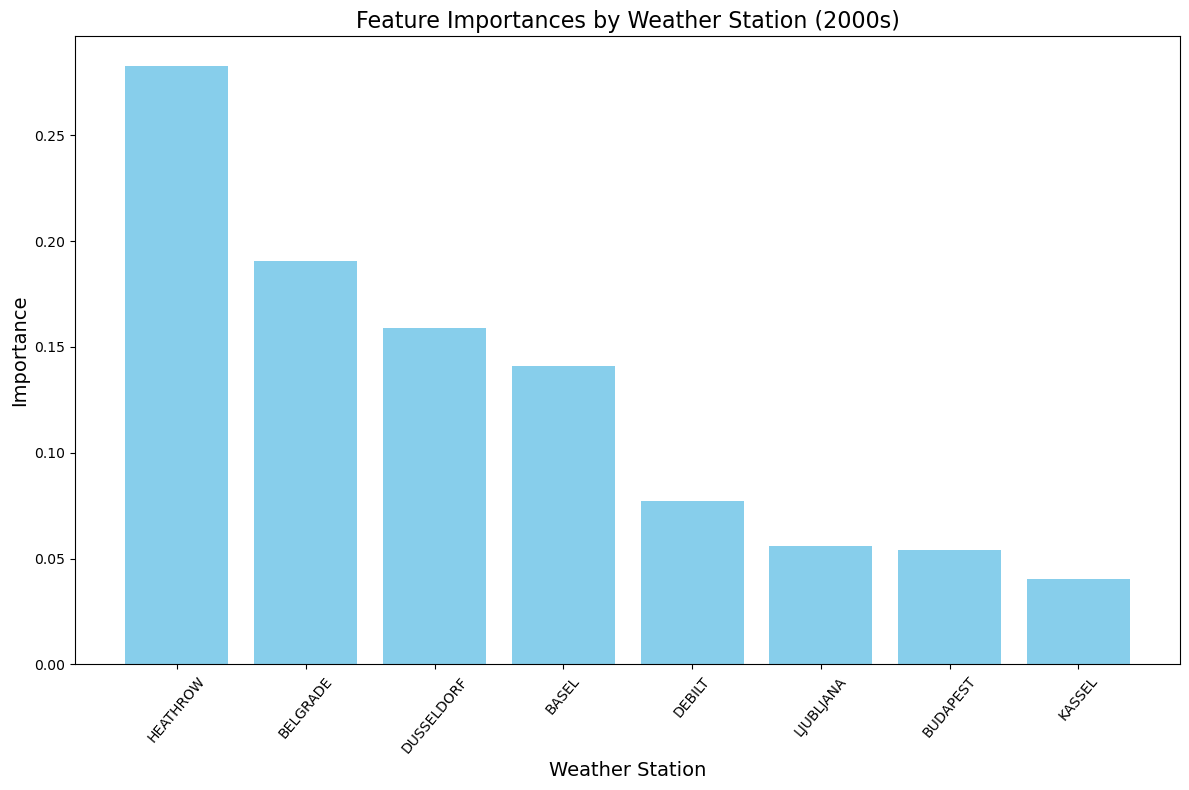

In [296]:
# Reshape the feature importances to (-1, 8, 17)
if len(feature_importances_2) > 1:
    reshaped_importances_2 = feature_importances_2.reshape(1, 8, 17)
    print("Reshaped Importances Shape:", reshaped_importances_2.shape)
else:
    reshaped_importances_2 = feature_importances_2
    print("Skipping reshaping as there's only one feature.")

# Continue with the rest of the code...
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_2)

plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()


(22950, 9)
(22950, 1)
Shape of y_heathrow: (22950,)
(22950,)
(22950, 9)
(22950,)
(17212, 9) (17212,)
(5738, 9) (5738,)
Heathrow Model Accuracy: 0.9986057859881492


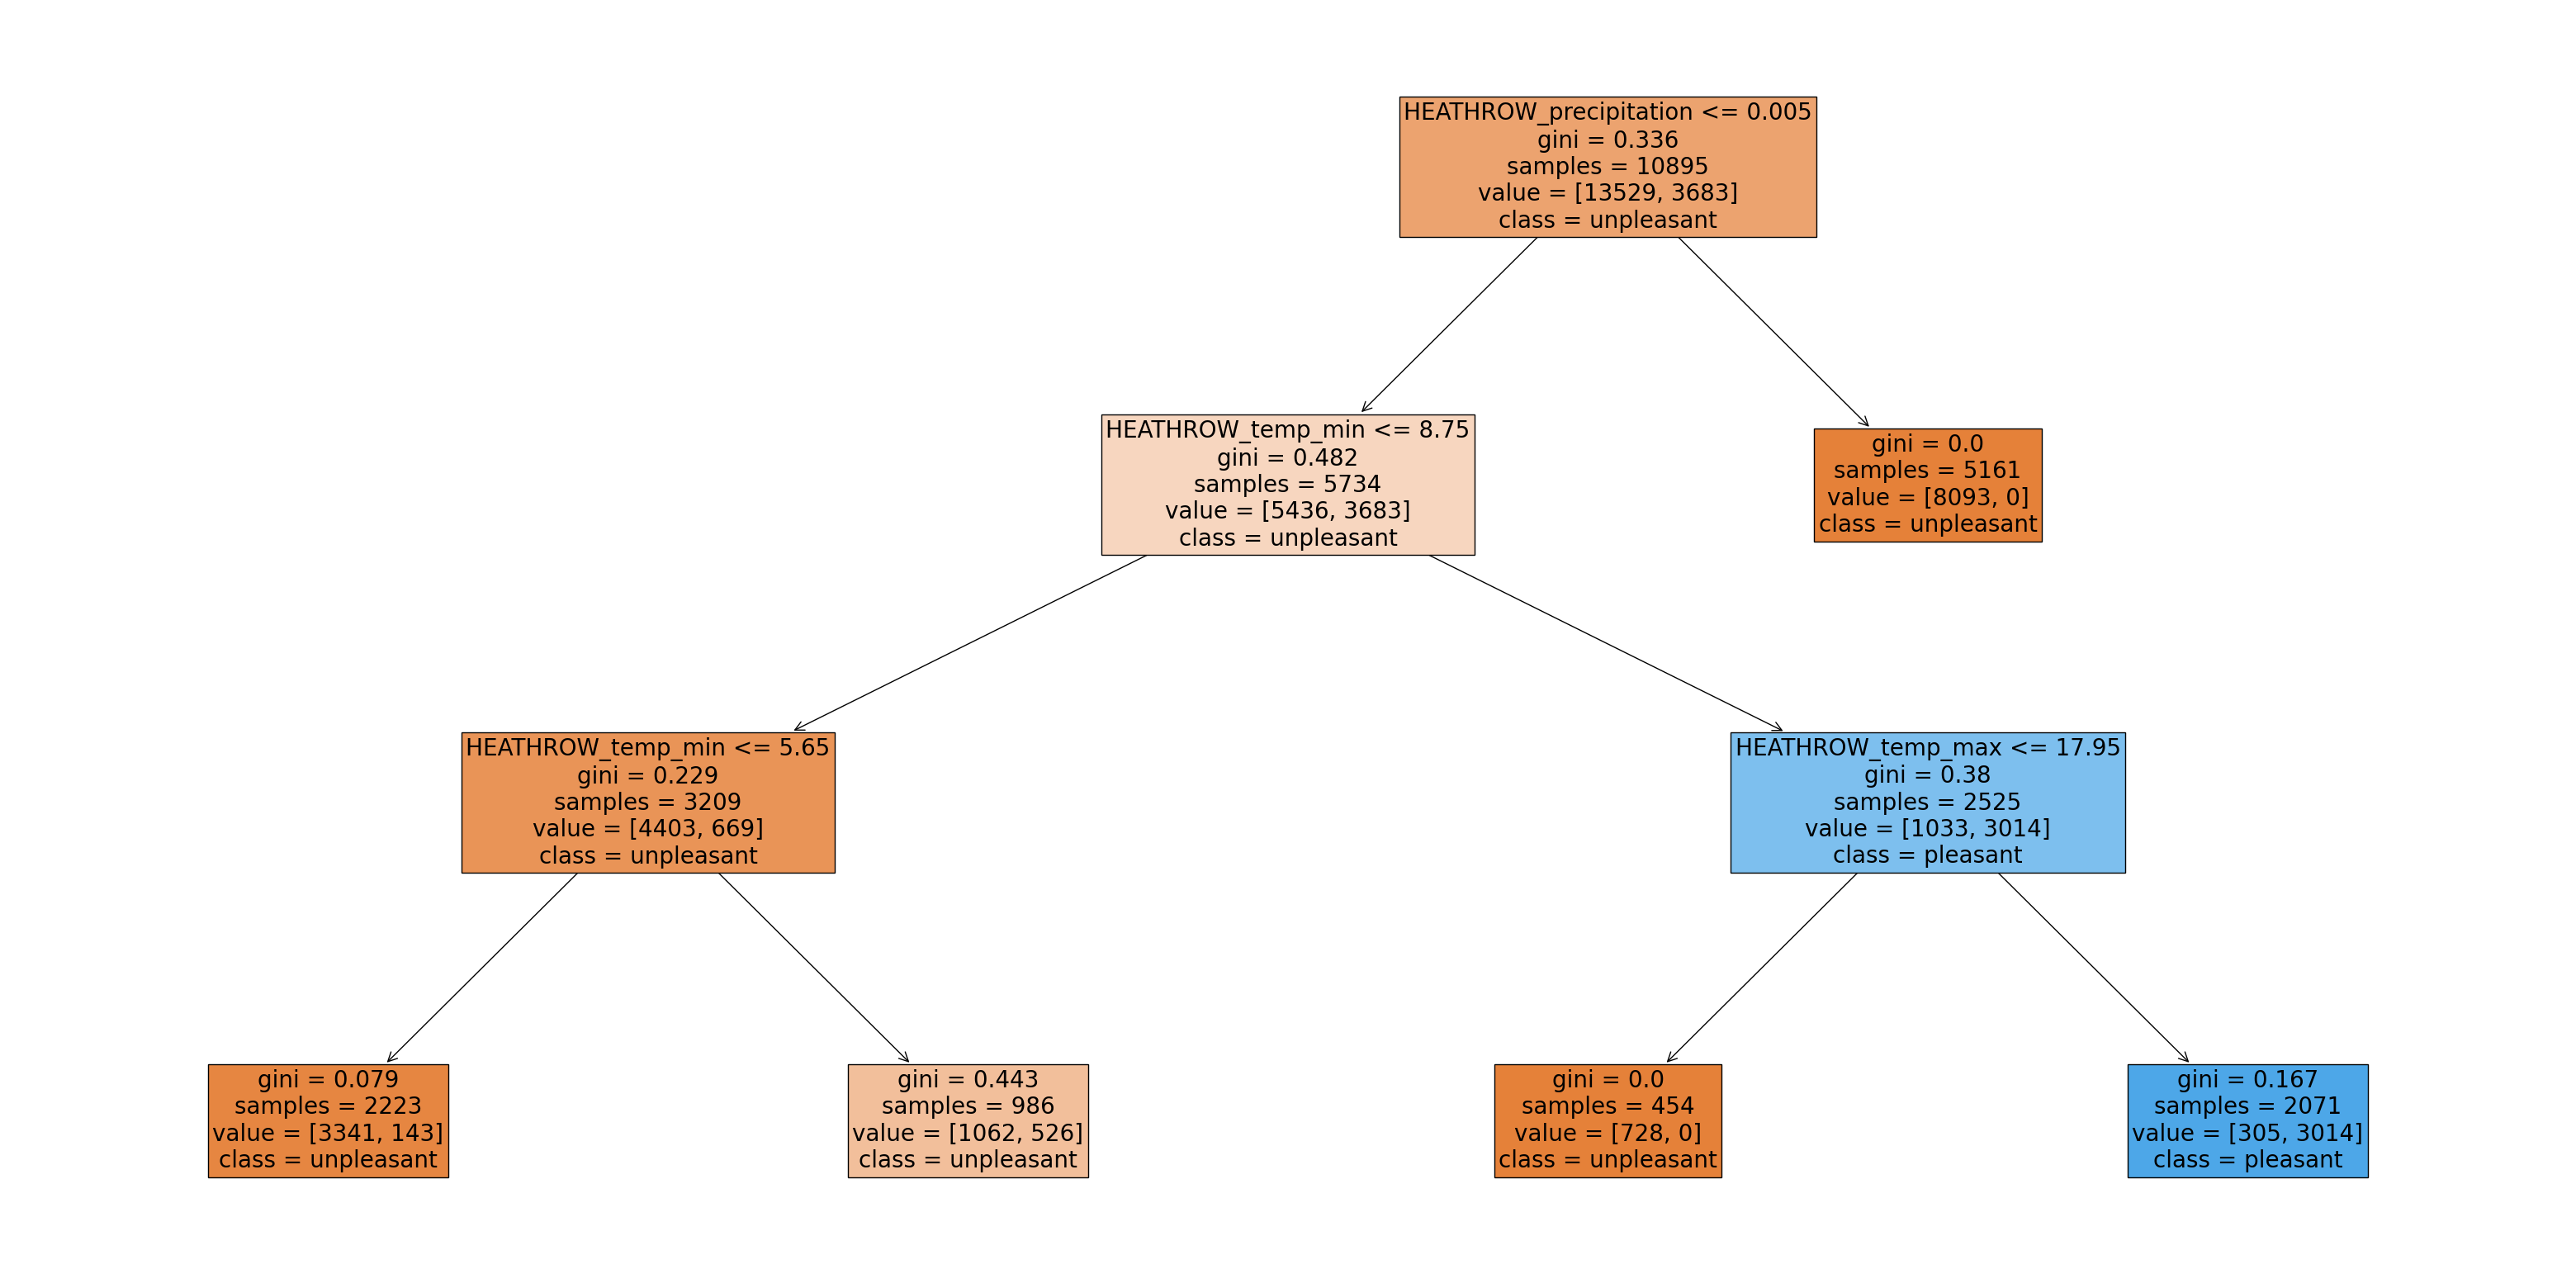

Heathrow Feature Importances: [0.00955348 0.04278376 0.01397306 0.08232832 0.22311732 0.08613858
 0.15472628 0.01403297 0.37334623]
(9,)
                 Measurement  Importance
8          HEATHROW_temp_max    0.373346
4     HEATHROW_precipitation    0.223117
6         HEATHROW_temp_mean    0.154726
5          HEATHROW_sunshine    0.086139
3  HEATHROW_global_radiation    0.082328
1          HEATHROW_humidity    0.042784
7          HEATHROW_temp_min    0.014033
2          HEATHROW_pressure    0.013973
0       HEATHROW_cloud_cover    0.009553


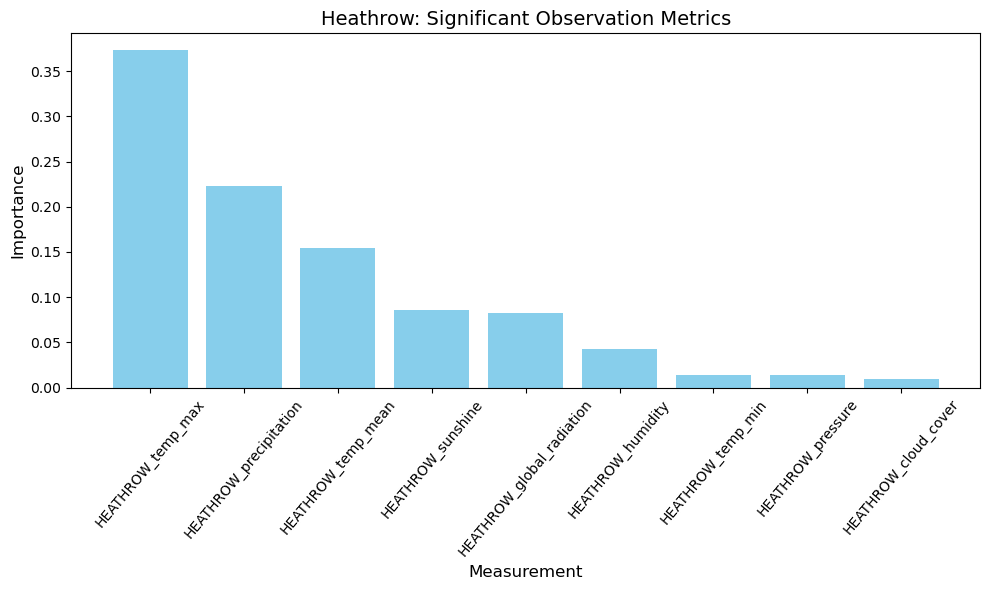

In [299]:
#4
#Heathrow
# Filter weather dataset to only include Heathrow
df_heathrow = weather_data[weather_data.columns[weather_data.columns.astype(str).str.startswith('HEATHROW')]]

# Filter pleasant dataset to only include Heathrow
heathrow_pleasant = pleasant_weather[pleasant_weather.columns[pleasant_weather.columns.astype(str).str.startswith('HEATHROW')]]

# Check shape
print(df_heathrow.shape)
print(heathrow_pleasant.shape)

# Create matrices
y_heathrow = heathrow_pleasant.max(axis=1)
print("Shape of y_heathrow:", y_heathrow.shape)

# Ensure y has the correct shape
y_heathrow = y_heathrow.to_numpy().reshape(-1)
print(y_heathrow.shape)

# Create X matrix
X_heathrow = df_heathrow.to_numpy()

# Check shapes of the matrices
print(X_heathrow.shape)
print(y_heathrow.shape)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_heathrow, X_test_heathrow, y_train_heathrow, y_test_heathrow = train_test_split(X_heathrow, y_heathrow, test_size=0.25, random_state=127)

# Check shapes
print(X_train_heathrow.shape, y_train_heathrow.shape)
print(X_test_heathrow.shape, y_test_heathrow.shape)

# Create a Random Forest for Heathrow
from sklearn.ensemble import RandomForestClassifier
clf_heathrow = RandomForestClassifier(n_estimators=100, max_depth=3)
clf_heathrow.fit(X_train_heathrow, y_train_heathrow)

# Perform the predictions on the test dataset
y_pred_heathrow = clf_heathrow.predict(X_test_heathrow)

# Use metrics module for accuracy calculation
from sklearn import metrics
print("Heathrow Model Accuracy:", metrics.accuracy_score(y_test_heathrow, y_pred_heathrow))

# Plot random forest (Heathrow)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(clf_heathrow.estimators_[5], fontsize=20, feature_names=df_heathrow.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

# Listing Feature Importances for Heathrow
feature_importances_heathrow = clf_heathrow.feature_importances_
print("Heathrow Feature Importances:", feature_importances_heathrow)
print(feature_importances_heathrow.shape)

# Create a dataframe to associate observation measurements with their importances
heathrow_measurements = df_heathrow.columns.tolist()
importances_df_heathrow = pd.DataFrame({
    'Measurement': heathrow_measurements,
    'Importance': feature_importances_heathrow
})

# Sort by importance for chart readability
importances_df_heathrow = importances_df_heathrow.sort_values(by='Importance', ascending=False)
print(importances_df_heathrow)

# Plot the importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df_heathrow['Measurement'], importances_df_heathrow['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Heathrow: Significant Observation Metrics', fontsize=14)
plt.tight_layout()
plt.show()


(22950, 9)
(22950, 1)
Shape of y_belgrade: (22950,)
(22950,)
(22950, 9)
(22950,)
(17212, 9) (17212,)
(5738, 9) (5738,)
Belgrade Model Accuracy: 0.9954688044614849


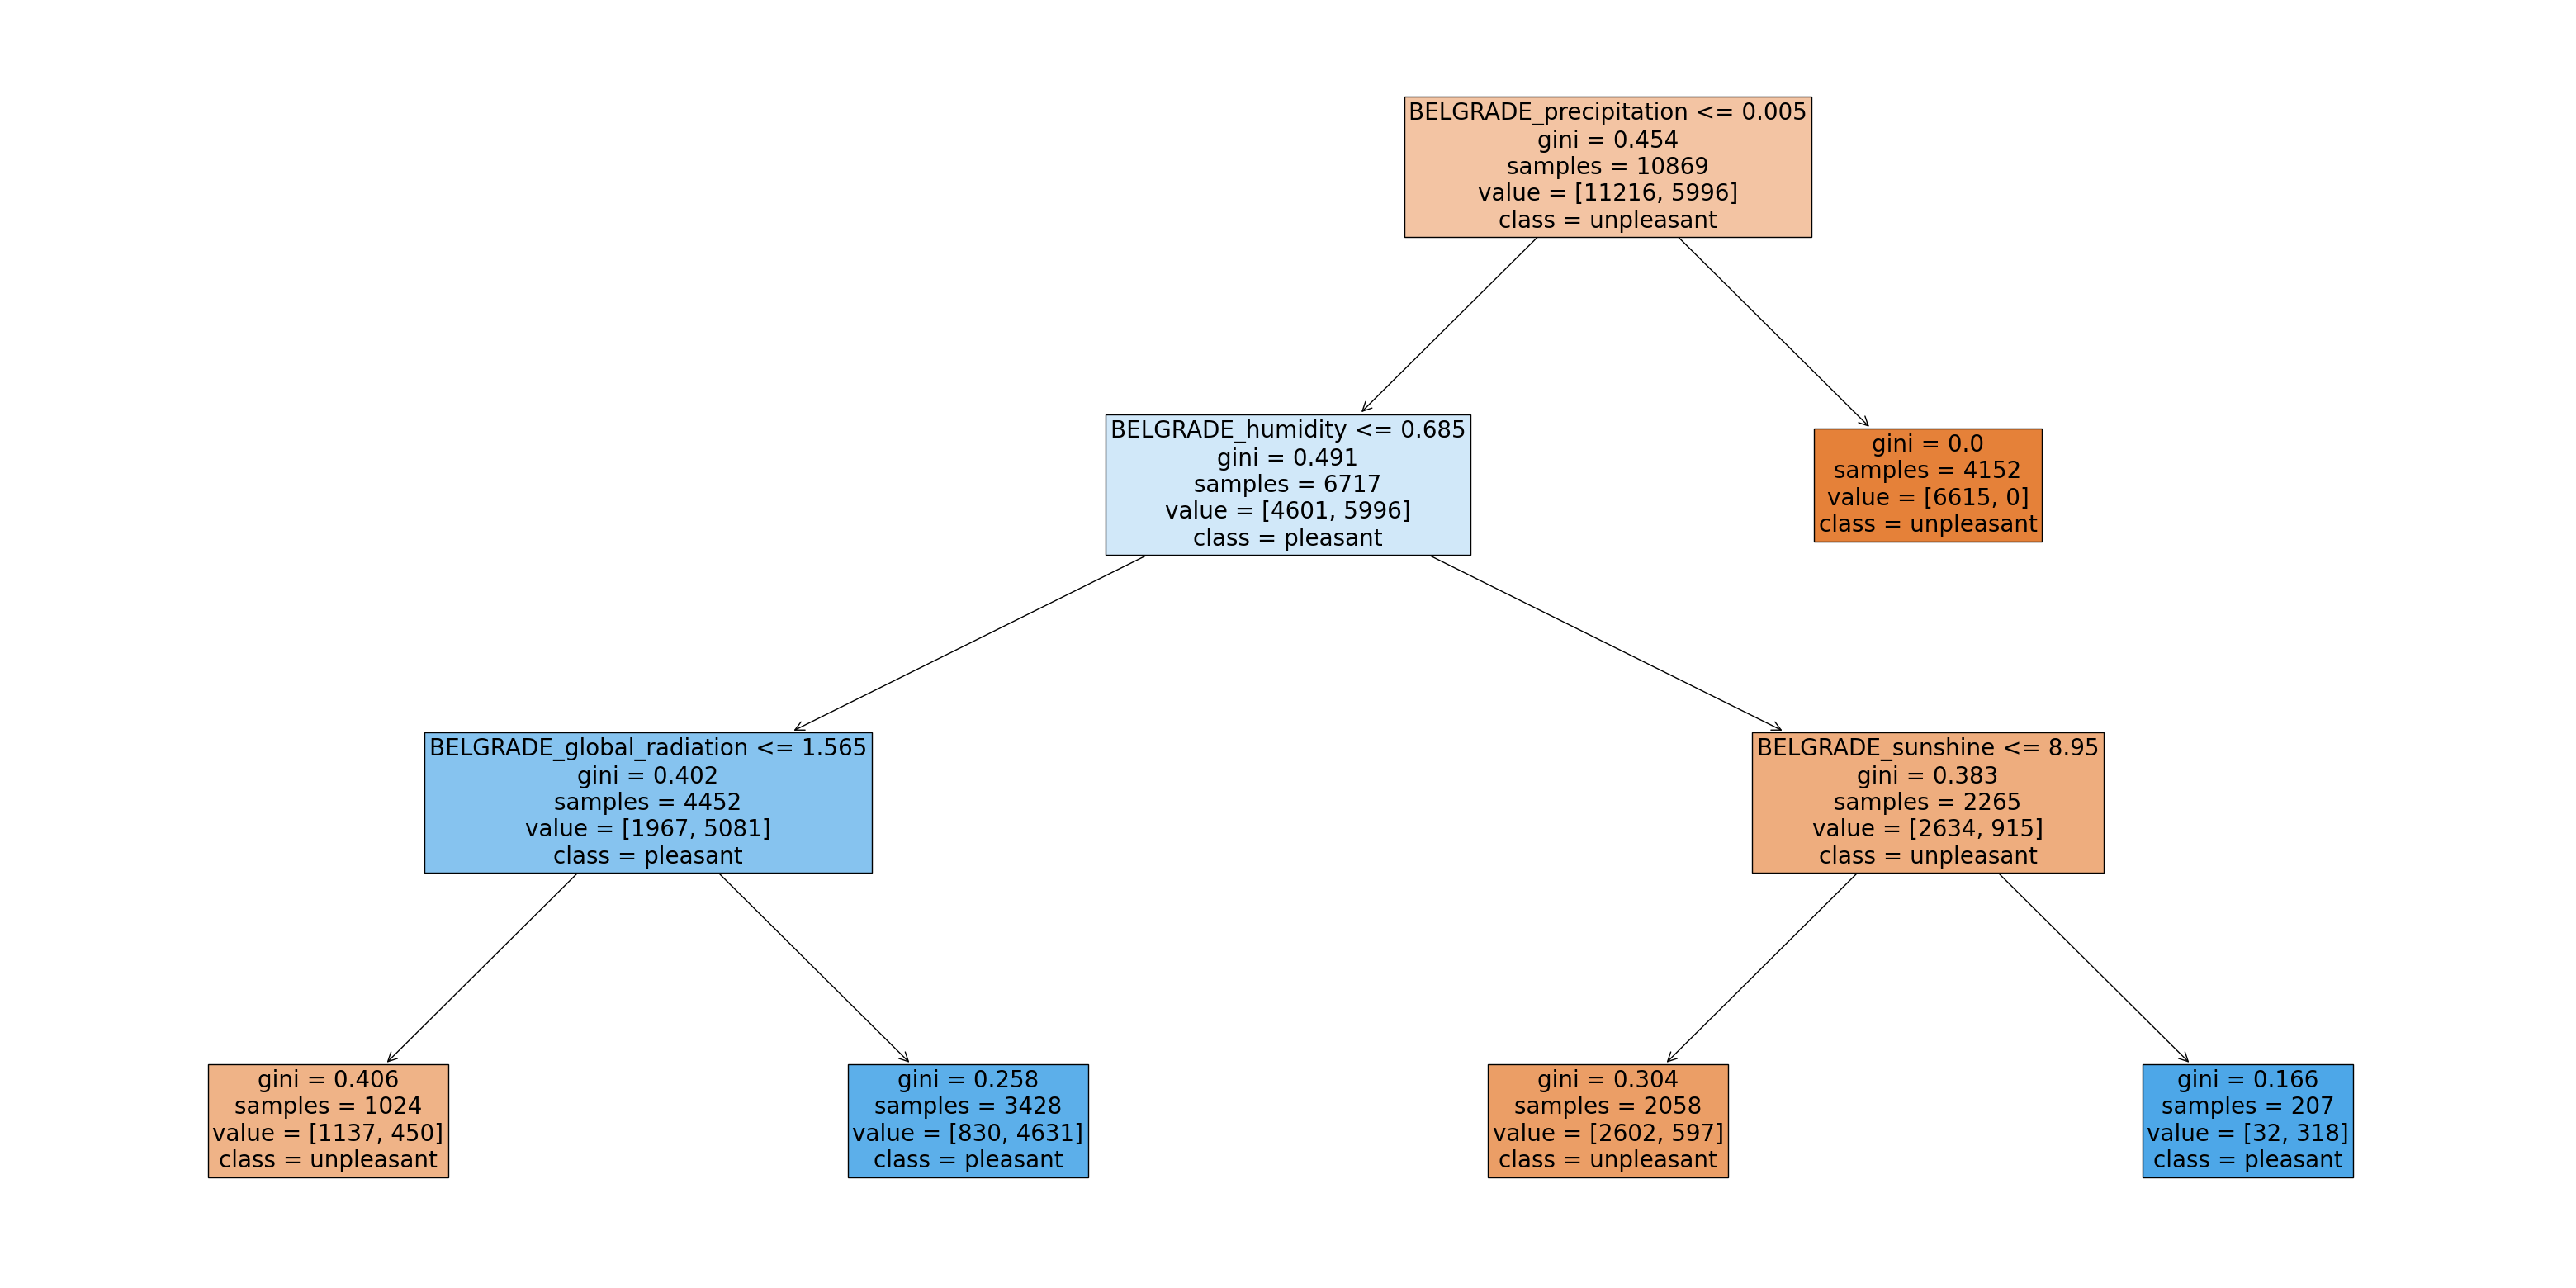

Belgrade Feature Importances: [0.03579941 0.0129147  0.00443196 0.07173756 0.28107238 0.08859709
 0.16210014 0.03564762 0.30769914]
(9,)
                 Measurement  Importance
8          BELGRADE_temp_max    0.307699
4     BELGRADE_precipitation    0.281072
6         BELGRADE_temp_mean    0.162100
5          BELGRADE_sunshine    0.088597
3  BELGRADE_global_radiation    0.071738
0       BELGRADE_cloud_cover    0.035799
7          BELGRADE_temp_min    0.035648
1          BELGRADE_humidity    0.012915
2          BELGRADE_pressure    0.004432


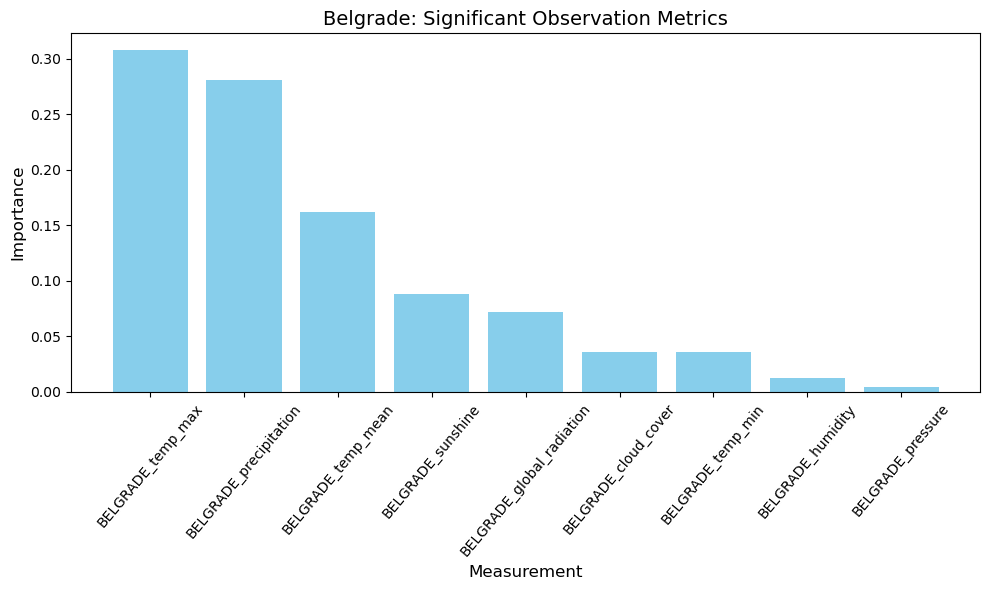

In [300]:
#Belgrade
# Filter weather dataset to only include Belgrade
df_belgrade = weather_data[weather_data.columns[weather_data.columns.astype(str).str.startswith('BELGRADE')]]

# Filter pleasant dataset to only include Belgrade
belgrade_pleasant = pleasant_weather[pleasant_weather.columns[pleasant_weather.columns.astype(str).str.startswith('BELGRADE')]]

# Check shape
print(df_belgrade.shape)
print(belgrade_pleasant.shape)

# Create matrices
y_belgrade = belgrade_pleasant.max(axis=1)
print("Shape of y_belgrade:", y_belgrade.shape)

# Ensure y has the correct shape
y_belgrade = y_belgrade.to_numpy().reshape(-1)
print(y_belgrade.shape)

# Create X matrix
X_belgrade = df_belgrade.to_numpy()

# Check shapes of the matrices
print(X_belgrade.shape)
print(y_belgrade.shape)

# Split data into training and testing sets
X_train_belgrade, X_test_belgrade, y_train_belgrade, y_test_belgrade = train_test_split(X_belgrade, y_belgrade, test_size=0.25, random_state=127)

# Check shapes
print(X_train_belgrade.shape, y_train_belgrade.shape)
print(X_test_belgrade.shape, y_test_belgrade.shape)

# Create a Random Forest for Belgrade
clf_belgrade = RandomForestClassifier(n_estimators=100, max_depth=3)
clf_belgrade.fit(X_train_belgrade, y_train_belgrade)

# Perform the predictions on the test dataset
y_pred_belgrade = clf_belgrade.predict(X_test_belgrade)

# Use metrics module for accuracy calculation
print("Belgrade Model Accuracy:", metrics.accuracy_score(y_test_belgrade, y_pred_belgrade))

# Plot random forest (Belgrade)
plt.figure(figsize=(40,20))
plot_tree(clf_belgrade.estimators_[5], fontsize=20, feature_names=df_belgrade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

# Listing Feature Importances for Belgrade
feature_importances_belgrade = clf_belgrade.feature_importances_
print("Belgrade Feature Importances:", feature_importances_belgrade)
print(feature_importances_belgrade.shape)

# Create a dataframe to associate observation measurements with their importances
belgrade_measurements = df_belgrade.columns.tolist()
importances_df_belgrade = pd.DataFrame({
    'Measurement': belgrade_measurements,
    'Importance': feature_importances_belgrade
})

# Sort by importance for chart readability
importances_df_belgrade = importances_df_belgrade.sort_values(by='Importance', ascending=False)
print(importances_df_belgrade)

# Plot the importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df_belgrade['Measurement'], importances_df_belgrade['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Belgrade: Significant Observation Metrics', fontsize=14)
plt.tight_layout()
plt.show()


(22950, 9)
(22950, 1)
Shape of y_dusseldorf: (22950,)
(22950,)
(22950, 9)
(22950,)
(17212, 9) (17212,)
(5738, 9) (5738,)
Dusseldorf Model Accuracy: 0.9993028929940746


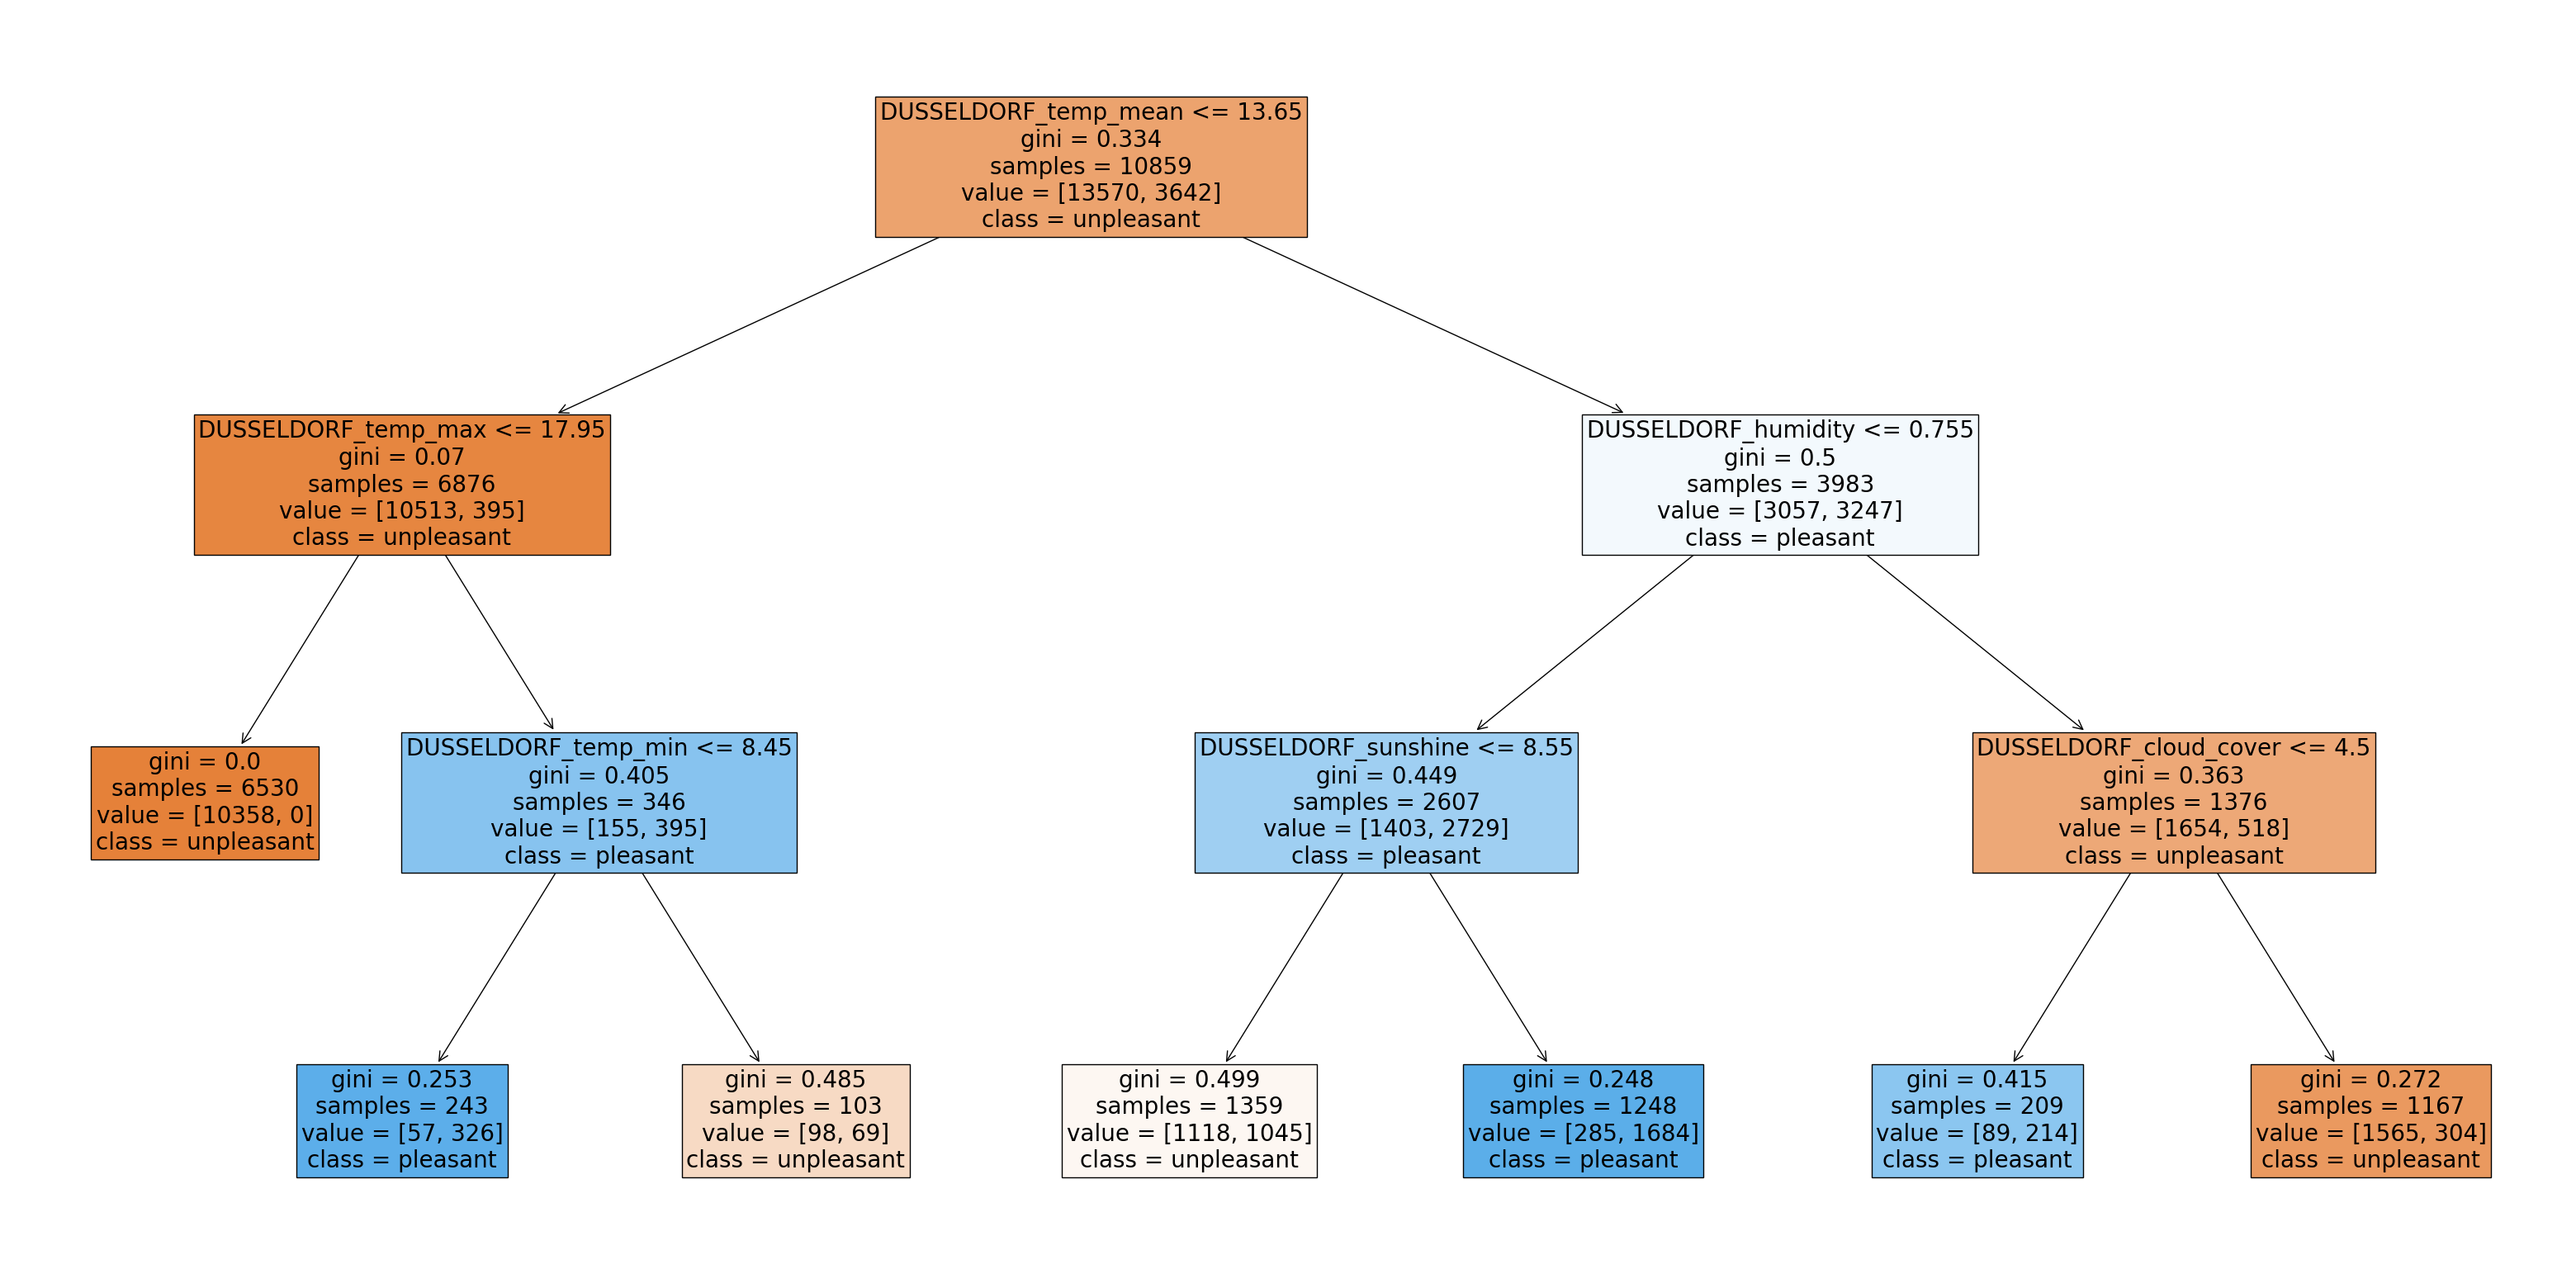

Dusseldorf Feature Importances: [0.05221709 0.01894699 0.00711898 0.11552906 0.24797674 0.08129991
 0.18121494 0.02204672 0.27364958]
(9,)
                   Measurement  Importance
8          DUSSELDORF_temp_max    0.273650
4     DUSSELDORF_precipitation    0.247977
6         DUSSELDORF_temp_mean    0.181215
3  DUSSELDORF_global_radiation    0.115529
5          DUSSELDORF_sunshine    0.081300
0       DUSSELDORF_cloud_cover    0.052217
7          DUSSELDORF_temp_min    0.022047
1          DUSSELDORF_humidity    0.018947
2          DUSSELDORF_pressure    0.007119


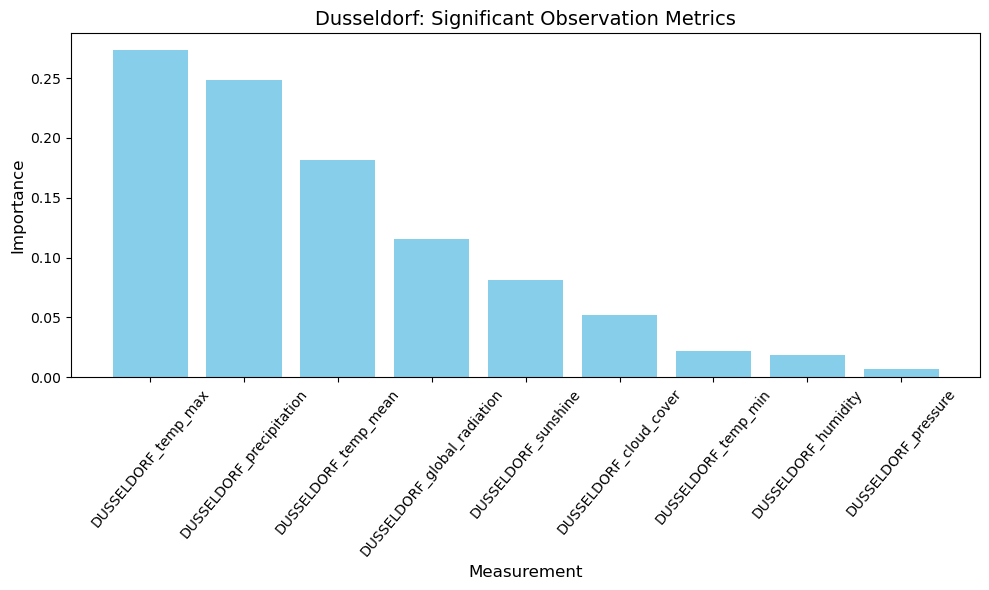

In [302]:
#Dusseldorf
# Filter weather dataset to only include Dusseldorf
df_dusseldorf = weather_data[weather_data.columns[weather_data.columns.astype(str).str.startswith('DUSSELDORF')]]

# Filter pleasant dataset to only include Dusseldorf
dusseldorf_pleasant = pleasant_weather[pleasant_weather.columns[pleasant_weather.columns.astype(str).str.startswith('DUSSELDORF')]]

# Check shape
print(df_dusseldorf.shape)
print(dusseldorf_pleasant.shape)

# Create matrices
y_dusseldorf = dusseldorf_pleasant.max(axis=1)
print("Shape of y_dusseldorf:", y_dusseldorf.shape)

# Ensure y has the correct shape
y_dusseldorf = y_dusseldorf.to_numpy().reshape(-1)
print(y_dusseldorf.shape)

# Create X matrix
X_dusseldorf = df_dusseldorf.to_numpy()

# Check shapes of the matrices
print(X_dusseldorf.shape)
print(y_dusseldorf.shape)

# Split data into training and testing sets
X_train_dusseldorf, X_test_dusseldorf, y_train_dusseldorf, y_test_dusseldorf = train_test_split(X_dusseldorf, y_dusseldorf, test_size=0.25, random_state=127)

# Check shapes
print(X_train_dusseldorf.shape, y_train_dusseldorf.shape)
print(X_test_dusseldorf.shape, y_test_dusseldorf.shape)

# Create a Random Forest for Dusseldorf
clf_dusseldorf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf_dusseldorf.fit(X_train_dusseldorf, y_train_dusseldorf)

# Perform the predictions on the test dataset
y_pred_dusseldorf = clf_dusseldorf.predict(X_test_dusseldorf)

# Use metrics module for accuracy calculation
print("Dusseldorf Model Accuracy:", metrics.accuracy_score(y_test_dusseldorf, y_pred_dusseldorf))

# Plot random forest (Dusseldorf)
plt.figure(figsize=(40,20))
plot_tree(clf_dusseldorf.estimators_[5], fontsize=20, feature_names=df_dusseldorf.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

# Listing Feature Importances for Dusseldorf
feature_importances_dusseldorf = clf_dusseldorf.feature_importances_
print("Dusseldorf Feature Importances:", feature_importances_dusseldorf)
print(feature_importances_dusseldorf.shape)

# Create a dataframe to associate observation measurements with their importances
dusseldorf_measurements = df_dusseldorf.columns.tolist()
importances_df_dusseldorf = pd.DataFrame({
    'Measurement': dusseldorf_measurements,
    'Importance': feature_importances_dusseldorf
})

# Sort by importance for chart readability
importances_df_dusseldorf = importances_df_dusseldorf.sort_values(by='Importance', ascending=False)
print(importances_df_dusseldorf)

# Plot the importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df_dusseldorf['Measurement'], importances_df_dusseldorf['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Dusseldorf: Significant Observation Metrics', fontsize=14)
plt.tight_layout()
plt.show()
